In [27]:
import pandas as pd
import pygraphviz as pgv
from IPython.display import Image

import warnings
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


In [28]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [29]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [30]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.

In [31]:
G = pgv.AGraph(directed=True)

In [32]:
for columna in df.columns:
    if columna.startswith('Preguntas'):
        G.add_node(columna)
        G.add_edge(columna, 'exitosos')
    elif columna == 'exitosos':
        G.add_node(columna)
        G.add_edge(columna, 'hito1')
    elif columna == 'hito1':
        G.add_node(columna)
        G.add_edge(columna, 'hito2')
    elif columna == 'hito2':
        G.add_node(columna)
        G.add_edge(columna, 'aprobado')
    elif columna == 'aprobado':
        G.add_node(columna)

In [33]:
G.write('causalidad.dot')

In [34]:
G.draw('causalidad.png', prog='dot', format='png')

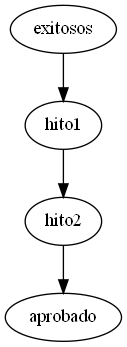

In [35]:
Image('causalidad.png')
